## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

In [1]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.22.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.1.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0


Hola voy a ejecutar el comando ```!pip freeze``` para cotillear a Google Colab

In [2]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.15.0'

#### **- Cargando el conjunto de datos**

In [33]:
# Importar MNIST dataset y cargar los datos
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Inspeccionamos nuestros datos originales
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Inspeccionamos y_test
print(y_test[0:20]) # Formato categorico.

# X -> gato ; C = {perros: 0, gatos: 1, sillas: 2, ordenadores: 3}
# silla: Categorico ->       [2]
# gato:  One-hot-encoding -> [0, 0, 1, 0]

# ¿Qué output nos dará la red? -> [0.20, 0.30, 0.5, 0.0]
# Loss (a minimizar) -> error = mean([0 - 0.20, 0-0.30,1-0.5, 0.00]^2)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


#### **- Inspeccionando el conjunto de datos**

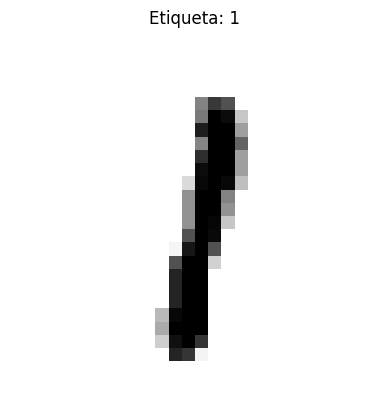

In [34]:
import matplotlib.pyplot as plt

# Función auxiliar
def display_digit(X_train, y_train, num):
  image = X_train[num, :, :]
  label = y_train[num]
  # Visualizamos
  plt.title("Etiqueta: " + str(label))
  plt.imshow(image, cmap=plt.get_cmap("gray_r"))
  plt.axis("off")
  plt.show()

display_digit(X_train=X_train, y_train=y_train, num=1200)



#### **- Acondicionando el conjunto de datos**

In [35]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Estandarizar los datos
X_train_n, X_test_n = X_train/255, X_test/255 # Valores entre 0 y 1

# Pasar los datos a one-hot-encoding
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)
print(y_train_ohe.shape)
print(y_test_ohe.shape)
print(y_train_ohe[12000, :])

# Partición de los datos: train -> train + validación
X_train_n_tr, X_train_n_val, y_train_ohe_tr, y_train_ohe_val  = train_test_split(
    X_train_n, y_train_ohe, test_size=0.15, random_state=42)
print(X_train_n_tr.shape)
print(X_train_n_val.shape)
print(y_train_ohe_tr.shape)
print(y_train_ohe_val.shape)

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(51000, 28, 28)
(9000, 28, 28)
(51000, 10)
(9000, 10)


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [36]:
# Importar api sequencial
from tensorflow.keras.models import Sequential
# Importar layers necesarios
from tensorflow.keras.layers import Dense, Flatten

# Creamos nuestra arquitectura de red:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax")) # (cuando toque) "sigmoid"
model.summary()

# Cada neurona de dense_1 784 pesos + 1 bias
# ¿Cuántos parametros tiene dense_1? -> 512*784 + 512*1 = 401,920


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Importamos optimizadores a emplear
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
# Compilación del modelo: especificar función de pérdidas (a minimizar) + optimizador
lr = 0.005
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr),
              metrics=["accuracy"]) # "binary_crossentropy"

# Acerca de funciones de activación + funciones de pérdida:

# NOTACION Y PRE-ACTIVACION
# y = [0, 0, 0, 1, 0] ; c = [0, 1, 2, 3, 4]
# Predicción: yhat = [0, 0.1, 0.2, 0.7, 0.0]
# yhat_logit (antes de la activación) = [-10, -23, -23, 10, 1]

# FUNCIONES DE ACTIVACION
# Sigmoide: yhat = 1/(1+exp(-yhat_logit_c))
# Softmax: yhat = exp(yhat_logit_c)/sum_cc(exp(yhat_logit_cc))

# FUNCIONES DE COSTE -> Clasificacion se emplea entropia cruzada H(y,yhat)
# Categorical Cross entropy - SI EMPLEAMOS SOFTMAX
# Hcat = - sum_c(y_c*log(yhat_c)) -> - 1 * log(0.7)
# Binary cross entropy - SI EMPLEAMOS SIGMOID
# Hbin = - sum_c( y_c*log(yhat) + (1-y_c)*log(1-yhat_c) )

# ¿Cuándo emplear cada función/activación?
# 1) Multi-clase y=[0, 0, 0, 1, 0]
#     - Más empleado: softmax + categorical_cross-entropy
#     - ¿Se podría emplear sigmoid? SI PERO utilizamos binary_cross_entropy
#     - Si utilizamos softmax, ¿Se puede utilizar binary_cross_entropy?
# 2) Multi-etiqueta y=[0, 1, 0, 1, 0]
#   yhat_logit (antes de la activación) = [-10, 20, -23, 20, -20]
#   MAL:  A) SOFTMAX  yhat = [0, 0.5, 0, 0.5, 0]
#   BIEN: B) SIGMOID  yhat = [0, 1, 0, 1, 0]
#   BIEN: Función de coste: binary cross entropy



In [38]:
# Entrenamiento
print("[INFO]: Entrenando red neuronal...")
epochs, batch_size = 50, 128
H = model.fit(X_train_n_tr, y_train_ohe_tr,
              validation_data=(X_train_n_val, y_train_ohe_val),
              epochs=epochs, batch_size=batch_size)

[INFO]: Entrenando red neuronal...
Epoch 1/50
399/399 [==============================] - 3s 4ms/step - loss: 1.5522 - accuracy: 0.6461 - val_loss: 1.0227 - val_accuracy: 0.8027
Epoch 2/50
399/399 [==============================] - 2s 4ms/step - loss: 0.8169 - accuracy: 0.8309 - val_loss: 0.6838 - val_accuracy: 0.8437
Epoch 3/50
399/399 [==============================] - 2s 4ms/step - loss: 0.6092 - accuracy: 0.8585 - val_loss: 0.5555 - val_accuracy: 0.8649
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.8730 - val_loss: 0.4875 - val_accuracy: 0.8749
Epoch 5/50
399/399 [==============================] - 2s 4ms/step - loss: 0.4644 - accuracy: 0.8816 - val_loss: 0.4452 - val_accuracy: 0.8821
Epoch 6/50
399/399 [==============================] - 2s 5ms/step - loss: 0.4297 - accuracy: 0.8876 - val_loss: 0.4156 - val_accuracy: 0.8881
Epoch 7/50
399/399 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8925 - val_loss: 0

#### **- Observando el proceso de entrenamiento para tomar decisiones**

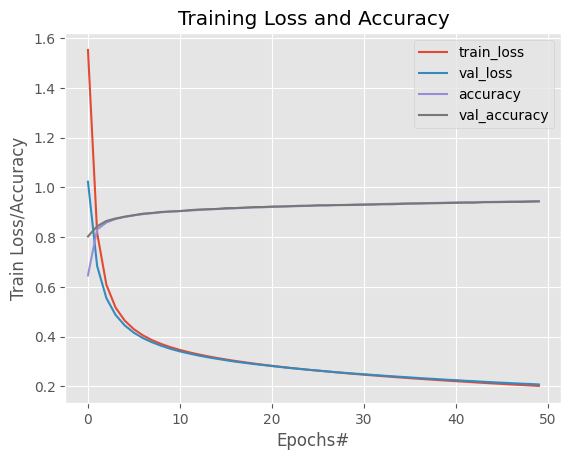

In [39]:
# Visualización curva de aprendizaje
def visualiza_learning_curve(H):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["accuracy"], label="accuracy")
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["val_accuracy"], label="val_accuracy")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epochs#")
  plt.ylabel("Train Loss/Accuracy")
  plt.legend()

visualiza_learning_curve(H)

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [46]:
# Testear nuestro modelo
from sklearn.metrics import classification_report

print("[TEST]: Testeando nuestra red...")
yhat_test = model.predict(X_test_n)
print(yhat_test.shape)
print(np.round(yhat_test[100, :], 2))
print(y_test_ohe[100, :])
print(classification_report(np.argmax(y_test_ohe, -1),
                            np.argmax(yhat_test, -1)
                            ))

[TEST]: Testeando nuestra red...
313/313 [==============================] - 1s 2ms/step
(10000, 10)
[0.   0.   0.02 0.   0.   0.   0.97 0.   0.   0.  ]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.93      0.96      0.94       982
           5       0.94      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



--------------------------------------------------------------------------

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

#### **- Inspeccionando el conjunto de datos**

#### **- Acondicionando el conjunto de datos**

#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

#### **- Observando el proceso de entrenamiento para tomar decisiones**

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

#### **- Dropout**

## **OTRAS CAPAS**
#### **- Batch Normalization**